# Simple MVP example

In [1]:
from __future__ import print_function
from IPython.display import SVG

## Mid-level API

In [2]:
from pyvpsolver import VPSolver, MVP, AFG, MPS

Define a MVP instance:

In [3]:
Ws = [(100, 75), (75, 50)]
Cs = [3, 2]
Qs = [-1, -1]
ws = [
    [(75, 50)], 
    [(40, 15), (25, 25)]
]
b = [2, 1]
instance = MVP(Ws, Cs, Qs, ws, b)

Build an arc-flow graph for the MVP instance:

In [4]:
afg = AFG(instance)

VPSolver 3.1.2, Copyright (C) 2013-2017, Filipe Brandao
Build (method = -3)
  #dp: 6
  Step-3' Graph: 7 vertices and 15 arcs (0.00s)
  Step-4' Graph: 6 vertices and 11 arcs (0.00s)
  #V4/#V3 = 0.86
  #A4/#A3 = 0.73
Ready! (0.00s)


Draw the arc-flow graph for the MVP instance:

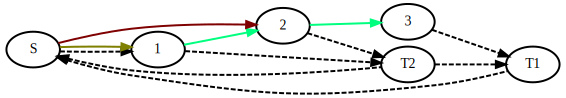

In [5]:
afg.draw("graph_mvp.svg", graph_attrs={"size": "8,8"})
SVG("graph_mvp.svg")

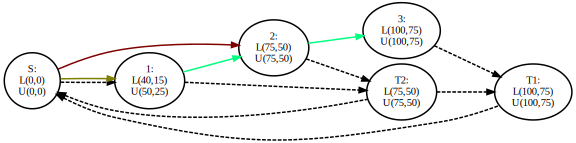

In [6]:
afg.draw("graph_mvp_lpaths.svg", lpaths=True, graph_attrs={"size": "8,8"})
SVG("graph_mvp_lpaths.svg")

Solve the MVP instance:

In [7]:
output, solution = VPSolver.script("vpsolver_glpk.sh", instance)

Copyright (C) 2013-2017, Filipe Brandao

>>> vbp2afg...
VPSolver 3.1.2, Copyright (C) 2013-2017, Filipe Brandao
Build (method = -3)
  #dp: 6
  Step-3' Graph: 7 vertices and 15 arcs (0.00s)
  Step-4' Graph: 6 vertices and 11 arcs (0.00s)
  #V4/#V3 = 0.86
  #A4/#A3 = 0.73
Ready! (0.00s)

>>> afg2mps...
VPSolver 3.1.2, Copyright (C) 2013-2017, Filipe Brandao
Generating the .MPS model...DONE!

>>> solving the MIP model using GLPK...
Note: different parameter settings may improve the performance substantially!
GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 --mps /tmp/LPf4YkVnUL/model.mps --seed 1234 -o /tmp/LPf4YkVnUL/sol.out
Reading problem data from `/tmp/LPf4YkVnUL/model.mps'...
Problem: ARCFLOW
Objective: OBJ
9 rows, 11 columns, 28 non-zeros
11 integer variables, 3 of which are binary
58 records were read
GLPK Integer Optimizer, v4.52
9 rows, 11 columns, 28 non-zeros
11 integer variables, 3 of which are binary
Preprocessing...
7 rows, 10 columns, 23 non-z

In [8]:
obj, patterns = solution
print("Obj: {}".format(obj))
print("Solution: {}".format(patterns))

Obj: 5
Solution: [[(1, [(0, 0), (1, 1)])], [(1, [(0, 0)])]]


Pretty-print the MVP solution:

In [9]:
from pyvpsolver.solvers import mvpsolver
mvpsolver.print_solution(solution)

Objective: 5
Solution:
Bins of type 1: 1 bin
1 x [i=1 opt=1, i=2 opt=2]
Bins of type 2: 1 bin
1 x [i=1 opt=1]


## High-level API

In [10]:
from pyvpsolver.solvers import mvpsolver

Solve the MVP instance using the high level API:

In [11]:
solution = mvpsolver.solve(Ws, Cs, Qs, ws, b, script="vpsolver_glpk.sh")

Copyright (C) 2013-2017, Filipe Brandao

>>> vbp2afg...
VPSolver 3.1.2, Copyright (C) 2013-2017, Filipe Brandao
Build (method = -3)
  #dp: 6
  Step-3' Graph: 7 vertices and 15 arcs (0.00s)
  Step-4' Graph: 6 vertices and 11 arcs (0.00s)
  #V4/#V3 = 0.86
  #A4/#A3 = 0.73
Ready! (0.00s)

>>> afg2mps...
VPSolver 3.1.2, Copyright (C) 2013-2017, Filipe Brandao
Generating the .MPS model...DONE!

>>> solving the MIP model using GLPK...
Note: different parameter settings may improve the performance substantially!
GLPSOL: GLPK LP/MIP Solver, v4.52
Parameter(s) specified in the command line:
 --mps /tmp/crHasjd8kI/model.mps --seed 1234 -o /tmp/crHasjd8kI/sol.out
Reading problem data from `/tmp/crHasjd8kI/model.mps'...
Problem: ARCFLOW
Objective: OBJ
9 rows, 11 columns, 28 non-zeros
11 integer variables, 3 of which are binary
58 records were read
GLPK Integer Optimizer, v4.52
9 rows, 11 columns, 28 non-zeros
11 integer variables, 3 of which are binary
Preprocessing...
7 rows, 10 columns, 23 non-z

In [12]:
mvpsolver.print_solution(solution)

Objective: 5
Solution:
Bins of type 1: 1 bin
1 x [i=1 opt=1, i=2 opt=2]
Bins of type 2: 1 bin
1 x [i=1 opt=1]
